# Author : Vatsal Kadakia

## Task1:Predict the percentage of a student based on the no. of study hours

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the dataset
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

# 1. Data Visualization

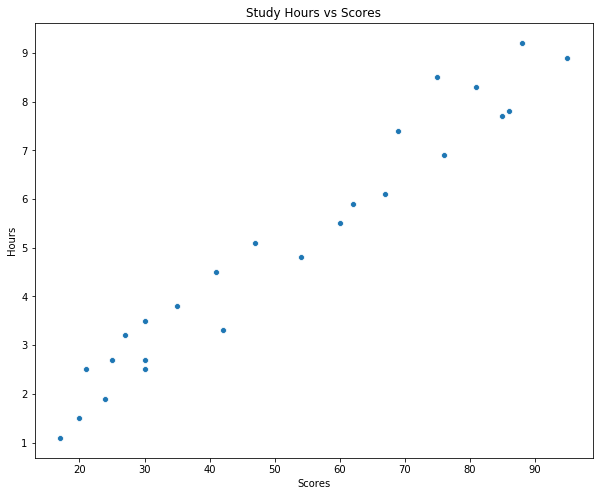

In [6]:
plt.figure(figsize=(10,8))
plt.title('Study Hours vs Scores')
sns.scatterplot(data=df,x='Scores',y='Hours')
plt.show()

As the no. of hours increases, the score also increases so the relation between Hours and Score(%) is positive

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


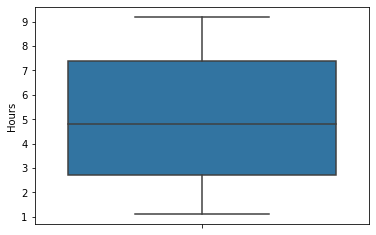

In [8]:
sns.boxplot(data=df,y=df['Hours'])
plt.show()

# 2.Data Preparation

In [9]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

# 3.Train Test Split

We will split the dataset into 75% training and 25% testing set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.80,random_state=5)

# 4.Model Building

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg=model.coef_*X+model.intercept_

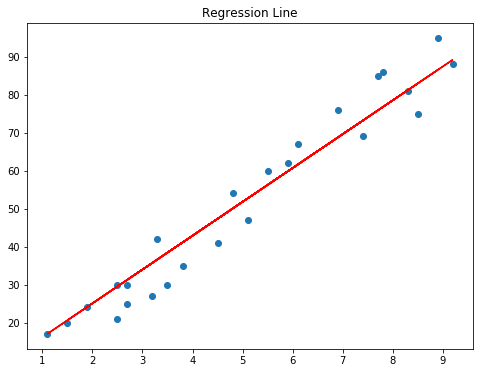

In [15]:
plt.figure(figsize=(8,6))
plt.title('Regression Line')
plt.scatter(X,y)
plt.plot(X,reg,color="r")
plt.show()

# 5.Predictions and Model Evaluations

In [16]:
predictions=model.predict(X_test)

In [17]:
predictions[:5]

array([73.10060178, 61.53385008, 35.73109628, 75.76985217, 49.96709838])

In [18]:
y_test[:5]

array([69, 67, 27, 85, 54], dtype=int64)

In [19]:
pred_df=pd.DataFrame({'True_Values':y_test,'Predicted':predictions})

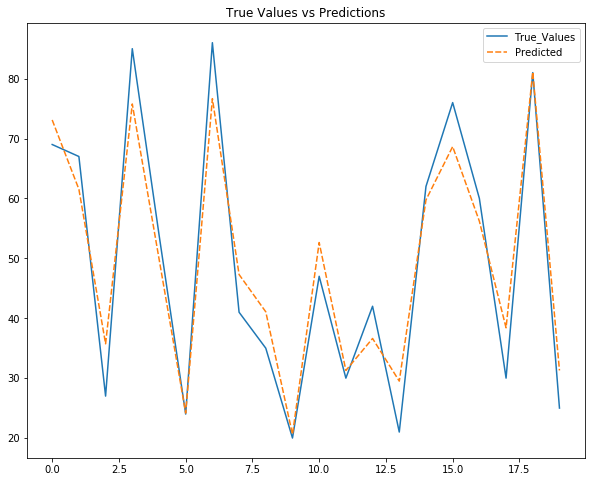

In [20]:
plt.figure(figsize=(10,8))
plt.title('True Values vs Predictions')
sns.lineplot(data=pred_df)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
print('MAE:',mean_absolute_error(y_test,predictions))
print('MSE:',mean_squared_error(y_test,predictions))
print('RSME:',np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 5.15143086080586
MSE: 35.336530978693716
RSME: 5.9444537998619955


In [23]:
#checking accuracy of model on test dataset
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9278978739033775


# 6.Predict the score if a student studies for 9.25 hours/day

In [24]:
def predict(hours):
    pred_score=model.predict(hours)
    return round(pred_score[0],2)
print('Predicted Score is:',predict([[9.25]]))

Predicted Score is: 89.56


## Thank you!!